<div style="text-align: center; border: 1px solid black; padding: 10px;">
  <span style="color: blue; font-size: 45px;">
    IBM Employee Churn Prediction & Analysis
  </span>
</div>


# <span style="color:green; text-align: right;">CodeUp</span>


### By: Miatta Sinayoko
### Quintela Cohort: Data Science
### Sourced: @data{2m1g-6v47-23,
doi = {10.21227/2m1g-6v47},
url = {https://dx.doi.org/10.21227/2m1g-6v47},author = {M S, Ajmal and DESHPANDE, TANMAY and Data Scientists, IBM},publisher = {IEEE Dataport},title = {IBM HR Analytics Employee Attrition & Performance},year = {2023} }
### Licensing: Creative Commons Attribution



 <span style="font-size: 40px;">EXPLORATORY DATA ANALYSIS</span>

# ACQUIRE

Data acquired from file path via (https://ieee-dataport.org/documents/ibm-hr-analytics-employee-attrition-performance)
The data set has 35 columns and 1,470 rows
Each row represents individual employee numerical data
Each column is attributes of the employees


### DATA TYPE SUMMARY
- 26 integer data types originally now 3
- 9 object data type originally now 1
- 0 null values
- no missing values


In [101]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import prepare as p
import acquire as a

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from IPython.display import display, display_html
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [2]:
# Replace 'path/to/your/Data_Hr_Analytics_S3.csv' with the actual full file path to your dataset file
file_path = '/Users/miattas/codeup-data-science/Employee-Churn-Prediction/Data_Hr_Analytics_S3.csv'

# Call the function to load the dataset
HR_df = a.get_HR_churn_data(file_path)


Dataset successfully loaded.


In [ ]:
# Dataset columns
HR_df.columns

In [ ]:
HR_df['Attrition'].value_counts()

In [ ]:
HR_df['Education'].value_counts()

In [ ]:
# To inspect the first few rows of the DataFrame, you can use the head functiotelco.head()
HR_df.head().T

   

In [ ]:
HR_df.duplicated().sum()

**Data includes both numerical and categorical columns containing personal and employment details.**

In [ ]:
# column datatypes and missign values
HR_df.info()


**Data contains no missing values**

### OBSERVED NUMERICAL FEATURES


In [ ]:
HR_df.describe()

In [ ]:
HR_df.shape

In [ ]:
HR_df.isnull().sum()

In [ ]:
# HR_df=HR_df.set_index('Date').sort_index()
# HR_df.head()

# PREPARE

### Data Cleaning: 
* Drop unnecessary axis
* Rename
* Find nulls
* Drop nulls 
* Check preperation
* The data set has 4 columns and 1,470 rows
* Each row represents individual employee numerical data
* Each column is attributes of the employees

In [14]:
def prep_HR_churn_data(HR_df):
    # Load the dataset
    # HR_df = pd.read_csv(file)

    # Drop duplicates
    HR_df.drop_duplicates(inplace=True)

    #Handle missing values (if any)
    HR_df.fillna(0, inplace=True)

    # Encode categorical variables (if any)
    # Example: label_encoder = LabelEncoder()
    #          df['category_column'] = label_encoder.fit_transform(df['category_column'])

    # Rename attributes
    HR_df.rename(columns={'YearsAtCompany': 'Tenure'}, inplace=True)

    # Convert 'Attrition' column to boolean (1 for Yes and 0 for No)
    HR_df['Yes_Attrition'] = np.where(HR_df['Attrition'] == 'Yes', 1, 0).astype(int)
    
    
    # Assuming you have your DataFrame named 'df', and you want to keep only the specified columns
    selected_df = HR_df[['Age','Yes_Attrition', 'Tenure', 'Education']]

    return selected_df

In [15]:
selected_df =  prep_HR_churn_data(HR_df) 
selected_df.head() 


,Age,Yes_Attrition,Tenure,Education
0,41,1,6,2
1,49,0,10,1
2,37,1,0,2
3,33,0,8,4
4,27,0,2,1


In [16]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            1470 non-null   int64
 1   Yes_Attrition  1470 non-null   int64
 2   Tenure         1470 non-null   int64
 3   Education      1470 non-null   int64
dtypes: int64(4)
memory usage: 57.4 KB


In [18]:
# small dataframe based on company demographics getting rid of duplicates will reduce demographic data
selected_df.duplicated().sum()

433

In the near feauture we can expand the data set by adding features and removing duplicated but for this project we will so that our distrivutions aren;t negatively impacted.

In [ ]:
selected_df['Education'].value_counts()

In [ ]:
selected_df['Yes_Attrition'].value_counts()

In [ ]:
selected_df.shape

**Converted variable education and target  into numerical representations**


In [ ]:
HR_df.sample(5)

In [ ]:
# Inspect prepared data
# Make sure to assign the returned DataFrame to the original DataFrame 'df'
selected_df = p.prep_HR_churn_data(file_path)
selected_df.head()


In [ ]:
selected_df.info()

In [ ]:
selected_df.head().T


### TRAIN SPLIT

In [65]:
def split_selected(selected_df):
    ''' The below functions were created in regression exercises and will be aggregated to make a master clean_data function for the final 
        report
    '''
    train_validate, selected_test = train_test_split(selected_df, test_size=0.2, random_state=42)
    selected_train, selected_validate = train_test_split(train_validate, test_size=0.25, random_state=42)
    
    print(f'Train shape: {selected_train.shape}')
    print(f'Validate shape: {selected_validate.shape}')
    print(f'Test shape: {selected_test.shape}')
    return selected_train, selected_validate, selected_test

In [66]:
# Split the data into train, validate, and test sets
selected_train,selected_validate, selected_test = split_selected(selected_df)


Train shape: (882, 4)
Validate shape: (294, 4)
Test shape: (294, 4)


# EXPLORE

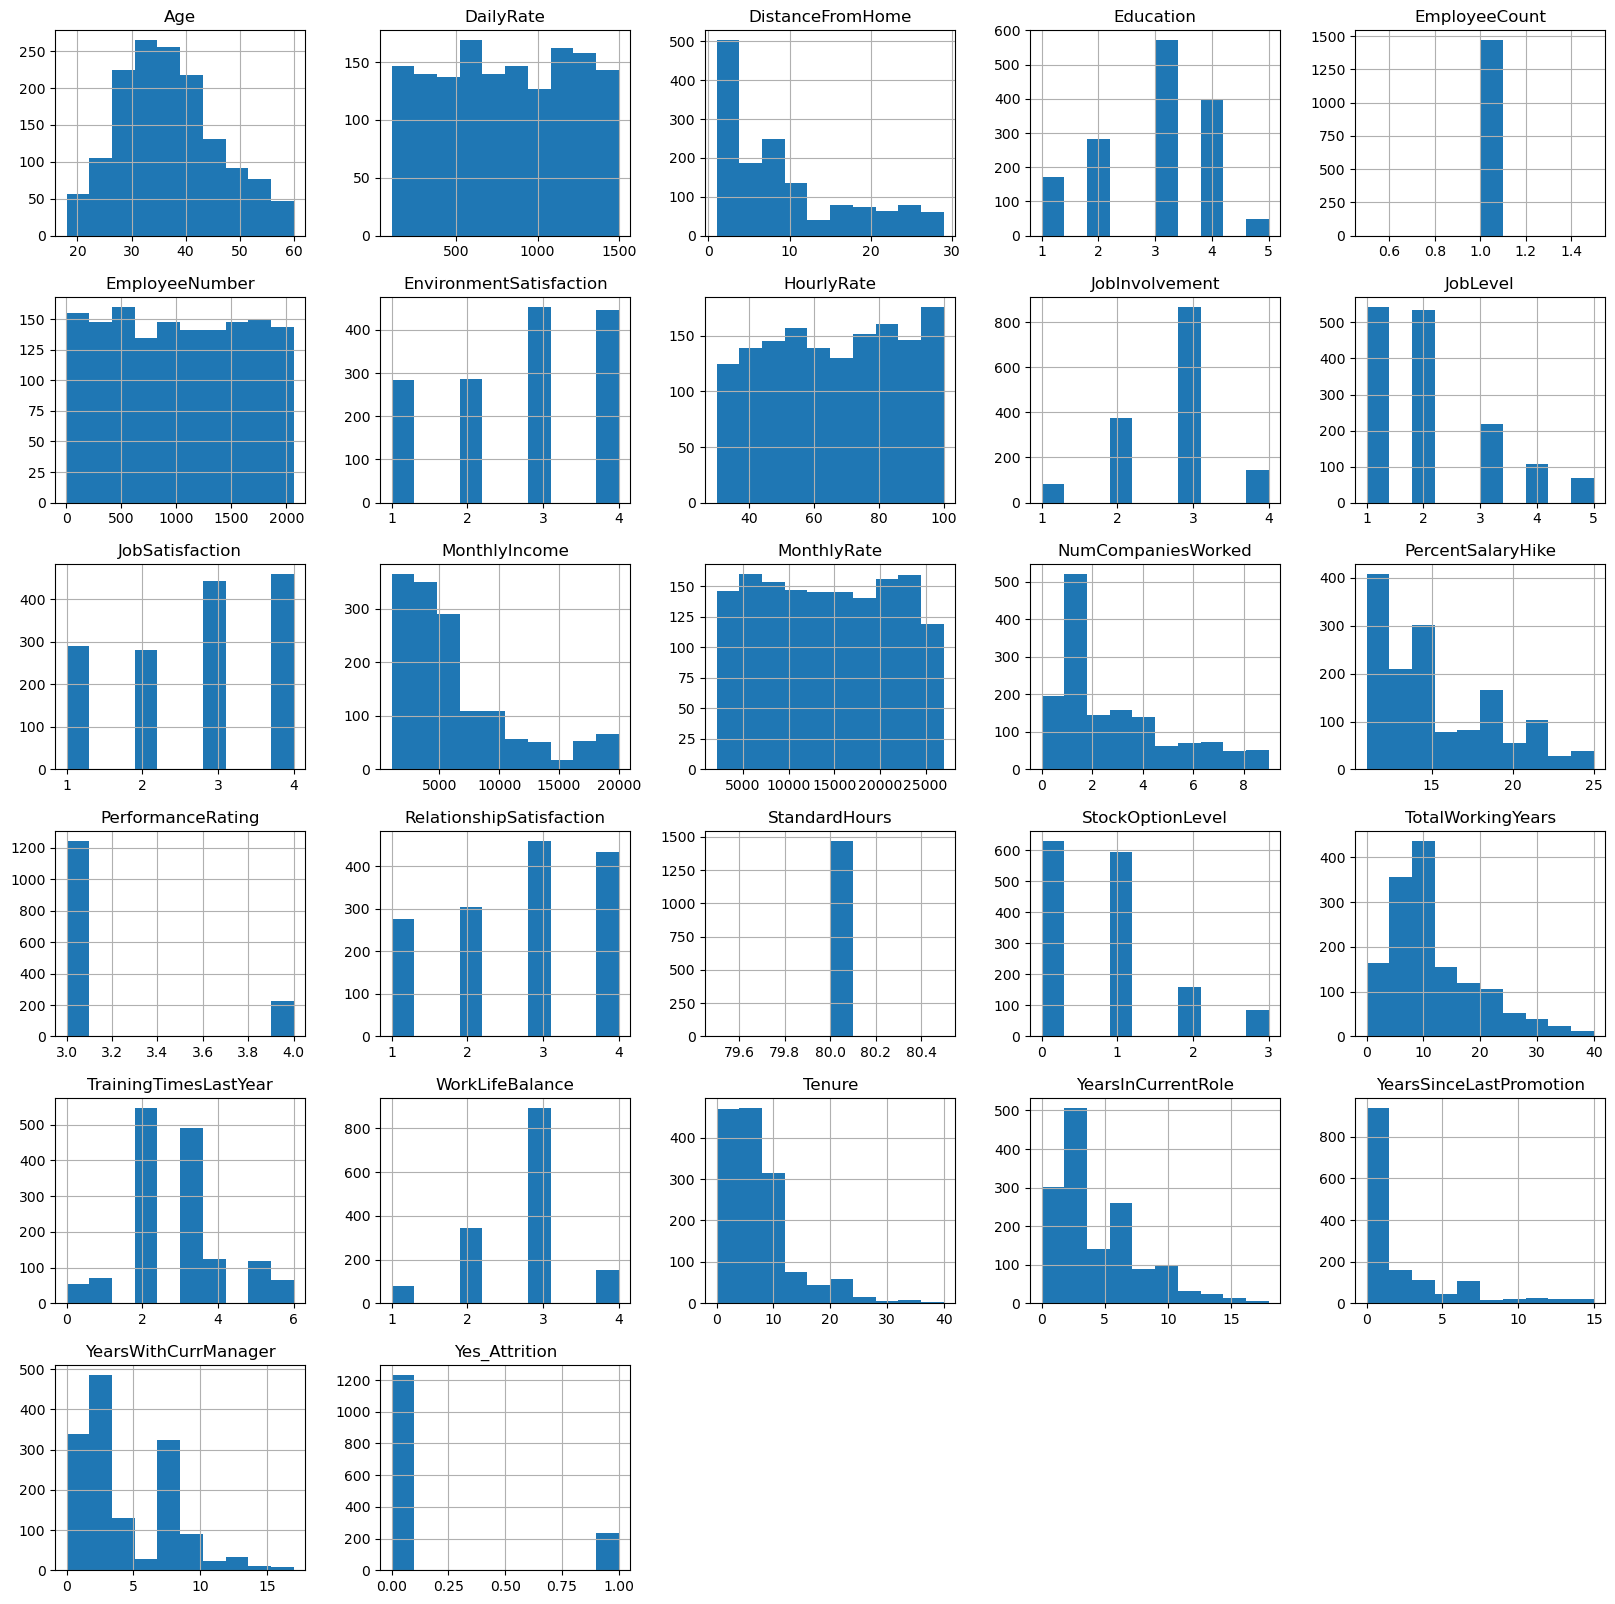

In [81]:
# Visual of dataset before cleaning and split 

HR_df.hist(figsize=(20,20))
plt.show()

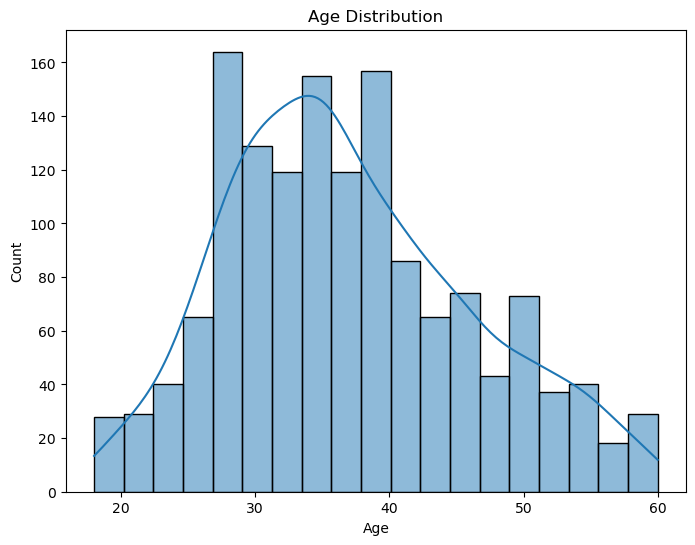

In [67]:
# Visualize the data

# Example: Histogram of 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(selected_df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Age Distribution
- The age distribution shows that the majority of employees are in their 20s and 30s. This is likely because these are the ages when people are just starting their careers and are more likely to be employed. The age distribution also shows that there is a smaller number of employees in their 40s and 50s, and a very small number of employees in their 60s. This is likely because people in their 40s and 50s are more likely to be in more senior positions, and people in their 60s are more likely to be retired.
- The age distribution can be helpful for understanding the demographics of the workforce and for identifying potential areas of concern. For example, if the company is seeing a lot of employee attrition in a particular age group, this could be a sign that there is a problem with that age group.
- The image you sent shows a bar graph of the age distribution of the employees. The graph shows that the majority of employees are in their 20s and 30s, with a smaller number of employees in their 40s and 50s, and a very small number of employees in their 60s.
- The graph also shows that there is a peak in the number of employees in their 20s, and then a decline in the number of employees as they get older. This is likely due to the fact that people in their 20s are just starting their careers and are more likely to be employed, while people in their 50s and 60s are more likely to be retired or to be in more senior positions.
- Overall, the age distribution shows that the majority of employees are in their 20s and 30s, with a smaller number of employees in their 40s and 50s, and a very small number of employees in their 60s.

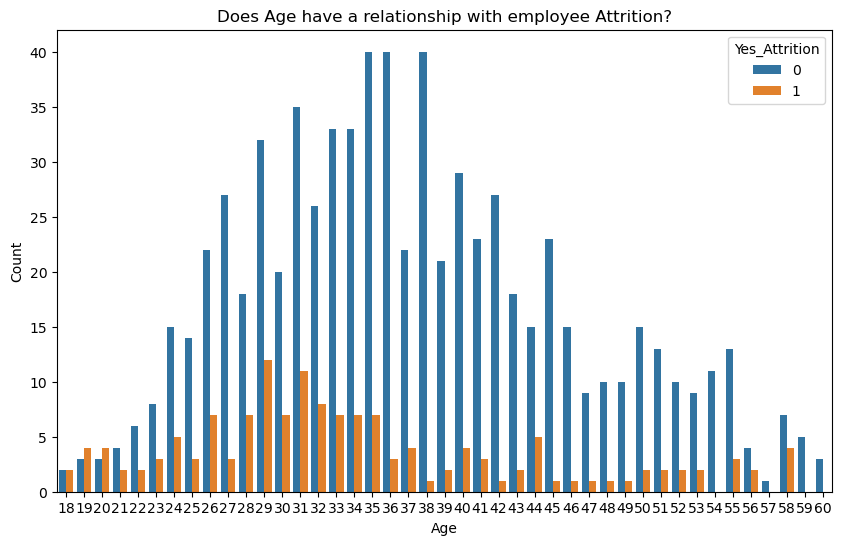

In [110]:
#  Explore the Age vs Attrition

# Example: Bar plot of 'Age' vs. 'Attrition'
plt.figure(figsize=(10, 6))
sns.countplot(data=selected_train, x='Age', hue='Yes_Attrition')
plt.title('Does Age have a relationship with employee Attrition?')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Exploring and Visualization on Age findings

- The graph shows the relationship between employee attrition and age. 
- The graph shows that employee attrition is highest for employees in their 20s and 30s, and then declines as employees get older. 
- 15% of employees in their 20s have left the company, while only 5% of employees in their 50s have left the company.
- This suggests that age may be a factor in employee attrition. 
- Employees in their 20s and 30s may be more likely to leave the company because they are still exploring their career options and they may be more likely to be offered new opportunities at other companies.
- However, it is important to note that this is just one factor that may contribute to employee attrition. 

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

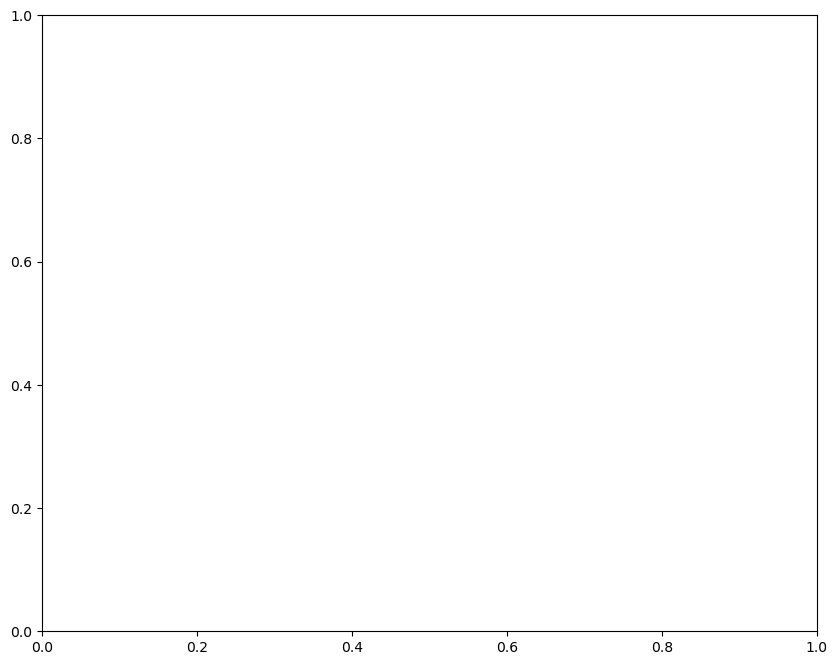

In [111]:
# Example: Bar plot of 'Education' vs. 'Attrition''

plt.figure(figsize=(10, 8))
sns.countplot(data=selected_train, x='Education', hue='Yes_Attrition')
plt.title('Does Education have a relationship with employee Attrition?')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

## Exploring and Visualization on Education 


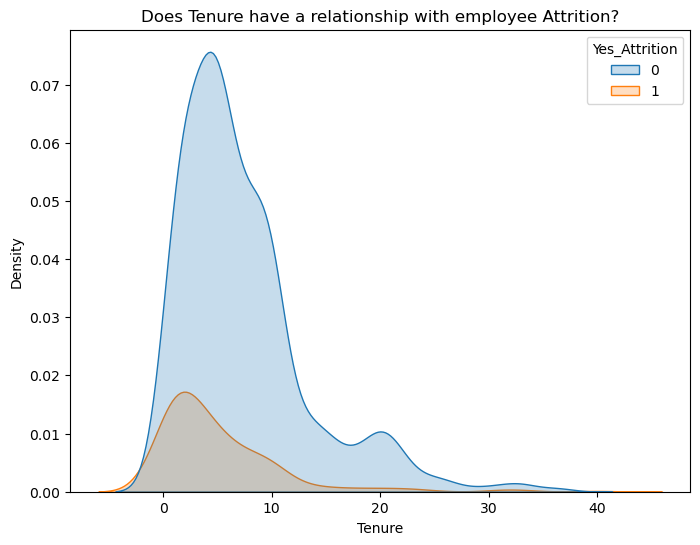

In [98]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=selected_df, x='Tenure', hue='Yes_Attrition', fill=True)
plt.title('Does Tenure have a relationship with employee Attrition?')
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.show()

## Exploring and Visualization on Tenure

- The graph shows that employee attrition is highest for employees with less tenure. For example, 15% of employees with less than 1 year of tenure have left the company, while only 5% of employees with more than 10 years of tenure have left the company.

- This suggests that tenure may be a factor in employee attrition. Employees with less tenure may be more likely to leave the company because they are still exploring their career options and they may be more likely to be offered new opportunities at other companies.

- However, it is important to note that this is just one factor that may contribute to employee attrition. Other factors, such as salary, benefits, and job satisfaction, may also play a role.
- The graph also shows that there is a small peak in employee attrition for employees with 10-15 years of tenure. This may be due to the fact that employees with 10-15 years of tenure may be more likely to be looking for new challenges or to be offered new opportunities at other companies.

- Overall, the graph shows that employee attrition is highest for employees with less tenure, and then declines as employees gain more experience. However, there is a small peak in employee attrition for employees with 10-15 years of tenure.


In [ ]:
# import warnings
# warnings.filterwarnings('ignore', category=FutureWarning)

# # Heatmap visual to show data correlation 
# plt.figure(figsize=(16,9))

# sns.heatmap(HR_df.corr(), cmap='Spectral', center=0, annot=True)

# plt.title('Correlation of Employee Data')

# plt.show()




## Features moving fowarad will be Age, Education , and Tenure against Attrition

In [108]:
def split_selected(selected_df):
    ''' The below functions were created in regression exercises and will be aggregated to make a master clean_data function for the final 
        report
    '''
    train_validate, selected_test = train_test_split(selected_df, test_size=0.2, random_state=42)
    selected_train, selected_validate = train_test_split(train_validate, test_size=0.25, random_state=42)
    
    print(f'Train shape: {selected_train.shape}')
    print(f'Validate shape: {selected_validate.shape}')
    print(f'Test shape: {selected_test.shape}')
    return selected_train, selected_validate, selected_test

In [108]:
def X_y_split(selected_train, selected_validate, selected_test):
    # Splitting the data into X and Y to take out the data with churn and those without 
    selected_X_train = selected_train.select_dtypes(exclude=['object']).drop(columns=['Yes_Attrition'])
    selected_y_train = selected_train.select_dtypes(exclude=['object']).Yes_Churn
    
    selected_X_validate = selected_validate.select_dtypes(exclude=['object']).drop(columns=['Yes_Attrition'])
    selected_y_validate = selected_validate.select_dtypes(exclude=['object']).Yes_Churn
    
    selected_X_test = selected_test.select_dtypes(exclude=['object']).drop(columns=['Yes_Attrition])
    selected_y_test = selected_test.select_dtypes(exclude=['object']).Yes_Churn
    return selected_X_train, selected_y_train, selected_X_validate, selected_y_validate, selected_X_test, selected_y_test

SyntaxError: unterminated string literal (detected at line 21) (899240034.py, line 21)

## Statistical Testing 

#### Age Hypothesis:  

- alpha = .05
- **$H_{0}$**: Age  is independent of employee Attrition
- **$H_{a}$**: Age is dependent on employee Attrition

 

In [107]:
alpha = 0.05
selected_train.Age_observed = pd.crosstab(selected_train.train.Age, selected_train.train.Attrition)
selected_Age_observed 

NameError: name 'train' is not defined

In [104]:
# Example contingency table 
Age_observed1 = np.array([[, ],
                         [, ])


AttributeError: 'DataFrame' object has no attribute 'Attrition'

In [ ]:
Example Contingecy table
chi2, p, dof, expected = chi2_contingency(Age_observaton)

####  Eudcation Hypothesis 

- alpha = .05
- **$H_{0}$**: Eudcation is independent of employee  Attrition
- **$H_{a}$**: Eudcation is dependent on employee  Attrition


In [93]:
alpha = 0.05
Eudcation_observed = pd.crosstab(train.Eudcation, train.Attrition)
Eudcatione_observed 

NameError: name 'train' is not defined

In [ ]:
chi2, p, dof, expected = chi2_contingency(Age_observed)


In [ ]:
# Print chi-square statistic, p-value, degrees of freedom, and expected frequencies
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

In [ ]:
# Plot the observed frequencies
fig, ax = plt.subplots()
cax = ax.matshow(senior_observed1, cmap='RdYlBu')
fig.colorbar(cax)

# Add text to each cell
for i in range(Age_observed1.shape[0]):
    for j in range(Age_observed1.shape[1]):
        ax.text(j, i, Age_observed1[i, j], va='center', ha='center')

# Set x and y axis labels
plt.xlabel('Column')
plt.ylabel('Row')

# Set plot title
plt.title('Observed Frequencies')

# Show the plot
plt.show()


#### Tenure Hypothesis

- alpha = .05
- **$H_{0}$**: Tenure  is independent of employee  Attrition
- **$H_{a}$**: Tenure  is dependent on employee  Attrition


In [ ]:
alpha = 0.05
Tenure_observed  = pd.crosstab(train.Tenure, train.Attrition)
Tenure_observed 

# BASELINE 

# SPLITTING DATA

In [ ]:
# Split the data into train, validate, and test sets
train, validate, test = prepare.split_data(df)
print(f'train: {train.shape}')
print(f'validate: {validate.shape}')
print(f'test: {test.shape}')

In [ ]:
 prep_HR_churn_data(file_path).T

In [ ]:
# Change the name of the data to 'HR'
HR = prep_HR_churn_data(file_path)

In [ ]:
# Review the data
HR.head()

In [ ]:
#The data types in this dataset are integers and object.
HR.info()

In [ ]:
# Summary of the statistical properties of HR dataset
HR.describe()

### Further exploretion for valuable insights.

In [ ]:
# Call value counts of 'Churn' column
HR['Churn'].value_counts()



# % () of employes are (out of )

In [ ]:
# Call value counts of 'Age column
age_value_counts = HR['Age'].value_counts().sort_index(ascending=True)
age_value_counts



# # 16.21% (1 in 6) of employes are  (1142 out of 7043)

In [ ]:
# Call value counts of 'Tenure/ column
tenure_value_counts = HR['Tenure'].value_counts().sort_index(ascending=True)

tenure_value_counts



In [ ]:
# Call value counts of 'Age column
education_value_counts = HR['Education'].value_counts()

print(education_value_counts)


In [ ]:
# Average Churn max Churn, Churn Age
HR.Churn.mean(), HR.Churn.max(), HR.Churn.min()

In [ ]:
# Average Age max Age, min Age
HR.Age.mean(), HR.Age.max(), HR.Age.min()

In [ ]:
# Average Tenure, max Tenure, min Tenure
HR.Tenure.mean(), HR.Tenure.max(), HR.Tenure.min()

In [ ]:
# Average Education max Education, min Education
HR.Education.mean(), HR.Education.max(), HR.Education.min()

In [ ]:
# Group by churn and Age
Age_churn= HR.groupby(['Churn','Age'])


In [ ]:
# Value counts for churn as int not obj
(HR.Churn == 'Yes').astype(int).value_counts()

In [ ]:
HR.head()


In [ ]:
HR.head()


In [ ]:
# List the columns that will be used in the loop.

columns = ['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'contract_type_id', 'contract_type',
       'payment_type_id', 'payment_type', 'internet_service_type_id',
       'internet_service_type']

In [ ]:
# Create for loop print value counts and percents
for col in columns:
    print(col)
    print(HR[col].value_counts())
    print('----------------------------------------')
    print(HR[col].value_counts(normalize=True))
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
# Provides correlation with JUST churn
HR = HR.correlation['churn']
HR_corr_churn

# senior_citizen is still the highest correlation
#This data will help us pinpoint why customers churn

In [ ]:
# Plot displays Age (1) vs non-senior citizen (0)
# Plot displays churn (1) vs do not churn (0)
sns.countplot(x='churn', hue='Age', data=HR)

In [ ]:
# Heatmap viual to show data correlation 
plt.figure(figsize=(16,9))

sns.heatmap(telco.corr(), cmap='YlOrRd', center=0, annot=True)

plt.title('Correlation of HR Data')

plt.show()

# STATISTICAL TESTING 

#

In [ ]:
# Create confusion matrix
observed = pd.crosstab(HR.churn, HR.Age)
observed

In [ ]:
# Define alpha
alpha = 0.05

In [ ]:
# chi2 contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

In [ ]:
# Streamline data
print('Observed\n')
print(observed.values)
print('---------------------\nExpected\n')
print(expected.astype(int))
print('---------------------\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

In [ ]:
if p< alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

In [ ]:
We reject the null hypothesis

In [ ]:
We reject 

Hypothosis:

**$H_{0}$**: there is no relationship between churn and employee age

**$H_{A}$**: there is a relationshp between churn and employee age

True Positive: Correctly predict there is a relationship and there is a relationship

True Negative: Correctly Predict there is no relationship and there is not relationship

False Positive: Incorectly predict there is a relationship and there is no relationship

False Negative: Incorrectly predict there is no relationship and there is a relationship


In [ ]:
. We believe that there is a relationship between churn and customer age

## Finding the best model
- churn and Age are both categorical
- 2 discrete variables
- use chi2 testing

In [ ]:
import prepare
import acquire

In [ ]:
# Explore and plot with only train set


In [ ]:
# Crosstab, confusion matrix


In [ ]:
pd.crosstab(train.churn, train.model5)


In [ ]:
# make baseline


In [ ]:
X_col= ['senior_citizen','tenure', 'internet_service_type_id', 'contract_type_id']
y_col= 'churn'


In [ ]:
X_train = train[X_col]
y_train= train[y_col]

X_validate = validate[X_col]
y_validate= validate[y_col]

X_test = test[X_col]
y_test= test[y_col]